In [28]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
from tensorflow.keras import models

import matplotlib.pyplot as plt


In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
train_dir=r'C:\Users\kushal yadav\OneDrive\Desktop\deeplearning\final project\Train'
validation_dir=r'C:\Users\kushal yadav\OneDrive\Desktop\deeplearning\final project\Validation'
test_dir=r'C:\Users\kushal yadav\OneDrive\Desktop\deeplearning\final project\Test'

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
#generating batches of tensor image data
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
                                )
test_datagen=ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(128,128),
 
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(128,128),
batch_size=32,
class_mode='binary')


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [33]:
from tensorflow.keras.applications import  VGG19

conv_base = VGG19 (weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))

In [34]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [35]:
from tensorflow.keras import layers
from tensorflow.keras import models


In [36]:
model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())


model.add(layers.Dense(256,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [38]:
conv_base.trainable=False

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [40]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc']
             )

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("final-{epoch:02d}.h5")

In [43]:
history = model.fit(
    train_generator,
    steps_per_epoch=312.5,
    
   epochs=6,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=[checkpoint_cb])

Epoch 1/6
313/312 [==============================] - 1435s 5s/step - loss: 0.1267 - acc: 0.9554 - val_loss: 0.0548 - val_acc: 0.9837
Epoch 2/6
313/312 [==============================] - 1428s 5s/step - loss: 0.1116 - acc: 0.9625 - val_loss: 0.0483 - val_acc: 0.9825
Epoch 3/6
313/312 [==============================] - 1431s 5s/step - loss: 0.1055 - acc: 0.9621 - val_loss: 0.0348 - val_acc: 0.9875
Epoch 4/6
313/312 [==============================] - 1446s 5s/step - loss: 0.1002 - acc: 0.9648 - val_loss: 0.0331 - val_acc: 0.9900
Epoch 5/6
313/312 [==============================] - 1484s 5s/step - loss: 0.0894 - acc: 0.9665 - val_loss: 0.0335 - val_acc: 0.9875
Epoch 6/6
313/312 [==============================] - 1521s 5s/step - loss: 0.0849 - acc: 0.9683 - val_loss: 0.0287 - val_acc: 0.9900


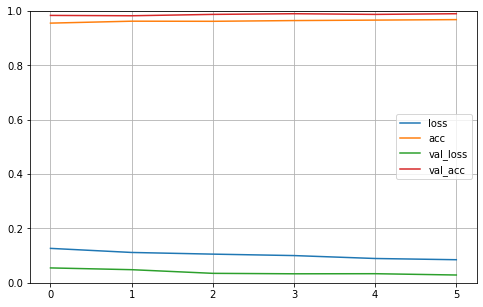

In [44]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(128,128),
batch_size=32,
class_mode='binary')


Found 992 images belonging to 2 classes.


In [46]:
model.evaluate(test_generator,steps=31)

31/31 [==============================] - 137s 4s/step - loss: 0.0325 - acc: 0.9899


[0.032455481588840485, 0.9899193644523621]